In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [6]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
ss=pd.read_csv('sample_submission.csv')
regist=pd.read_csv('registration.csv')

In [7]:
df = pd.DataFrame(np.arange(1, 819))
test['ID']=df
dfs = pd.DataFrame(np.arange(1, 6549))
train['ID']=dfs

In [8]:
train.drop(['Program ID','Student ID','Student ID','Program Main Category Code','Program Sub Category Code','Program Start Date','Program End Date'],axis=1,inplace=True)
test.drop(['Program ID','Student ID','Student ID','Program Main Category Code','Program Sub Category Code','Program Start Date','Program End Date'],axis=1,inplace=True)

In [9]:
train.shape

(6548, 19)

In [10]:
test.shape

(818, 18)

In [11]:
#The cardinality of each catgorical feature (Training)
cat_cols = list(train.select_dtypes(include=['object']).columns)
for col in cat_cols:
    print(col, train[col].nunique())

Gender 2
Home Region 13
Home City 92
Technology Type 3
Program Skill Level 3
Program Presentation Method 2
Completed Degree 2
Level of Education 5
Education Speaciality 871
College 9
Employment Status 6
Job Type 4
Still Working 2


In [12]:
feats= ['Gender','Home Region','Home City','Technology Type','Program Skill Level','Program Presentation Method'
        ,'Completed Degree','Level of Education','Education Speaciality'
        ,'College','Employment Status','Job Type','Still Working']
le=LabelEncoder()
df=train
for f in feats :
    le.fit(df[f])
    train[f]=le.transform(train[f])

In [13]:
df=test
for f in feats :
    le.fit(df[f])
    test[f]=le.transform(test[f])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             6456 non-null   float64
 1   Gender                          6548 non-null   int64  
 2   Home Region                     6548 non-null   int64  
 3   Home City                       6548 non-null   int64  
 4   Technology Type                 6548 non-null   int64  
 5   Program Skill Level             6548 non-null   int64  
 6   Program Presentation Method     6548 non-null   int64  
 7   Program Days                    6548 non-null   int64  
 8   Completed Degree                6548 non-null   int64  
 9   Level of Education              6548 non-null   int64  
 10  Education Speaciality           6548 non-null   int64  
 11  College                         6548 non-null   int64  
 12  University Degree Score         64

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             804 non-null    float64
 1   Gender                          818 non-null    int64  
 2   Home Region                     818 non-null    int64  
 3   Home City                       818 non-null    int64  
 4   Technology Type                 818 non-null    int64  
 5   Program Skill Level             818 non-null    int64  
 6   Program Presentation Method     818 non-null    int64  
 7   Program Days                    818 non-null    int64  
 8   Completed Degree                818 non-null    int64  
 9   Level of Education              818 non-null    int64  
 10  Education Speaciality           818 non-null    int64  
 11  College                         818 non-null    int64  
 12  University Degree Score         807 

In [18]:
train.describe()

,Age,Gender,Home Region,Home City,Technology Type,Program Skill Level,Program Presentation Method,Program Days,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,ID
count,6456.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6467.000000,6467.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000
mean,26.831165,0.440440,4.685247,28.030696,1.566891,1.514050,0.241906,19.691662,0.795052,0.462279,559.466097,8.322694,8.224432,9.773929,2.975107,3.455712,1.585217,0.158674,3274.500000
std,5.535967,0.496478,2.629575,15.485804,1.406834,1.175569,0.428270,32.112061,0.403695,1.128229,219.562633,1.515419,19.120384,21.259962,1.778430,1.087732,0.683597,0.365400,1890.389113
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,4.000000,23.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,487.000000,8.000000,3.300000,5.000000,1.000000,3.000000,1.000000,0.000000,1637.750000
50%,25.000000,0.000000,4.000000,23.000000,2.000000,2.000000,0.000000,12.000000,1.000000,0.000000,651.000000,9.000000,4.000000,5.000000,4.000000,4.000000,2.000000,0.000000,3274.500000
75%,29.000000,1.000000,4.000000,23.000000,3.000000,3.000000,0.000000,19.000000,1.000000,0.000000,738.000000,9.000000,4.510000,5.000000,4.000000,4.000000,2.000000,0.000000,4911.250000
max,57.000000,1.000000,13.000000,92.000000,3.000000,3.000000,1.000000,292.000000,1.000000,5.000000,871.000000,9.000000,100.000000,100.000000,6.000000,4.000000,2.000000,1.000000,6548.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age'>

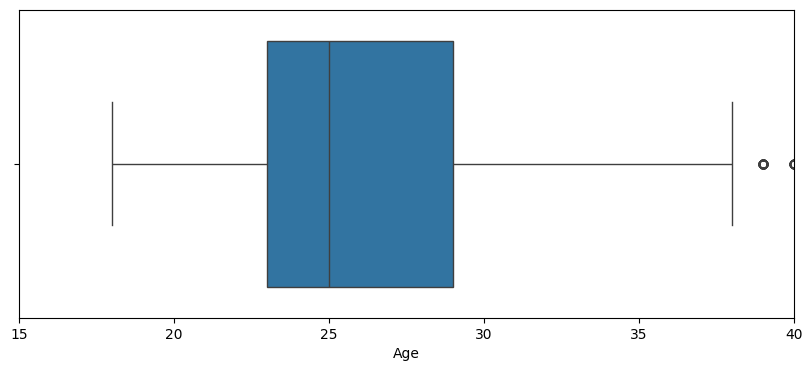

In [23]:
plt.figure(figsize=(10,4))
plt.xlim(15, 40)
sns.boxplot(x=train.Age)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X=train.drop('Y',axis=1)
y=train['Y'].copy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
xg=  CatBoostClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
result=f1_score(y_pred,y_test)

print(result)


In [ ]:
xg.fit(X,y)
test['Y']=xg.predict(test)

In [ ]:
submission=pd.DataFrame({"ID":test['ID'],"Y":test["Y"]})

In [ ]:
submission.to_csv("score609.csv",index=False)